### Deliverable 1: Preprocessing the Data for a Neural Network

In [115]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [116]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
columns_todrop=["EIN","NAME"]
application_df=application_df.drop(columns_todrop,1)

In [117]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [118]:
# Look at APPLICATION_TYPE value counts for binning
application_count=application_df["APPLICATION_TYPE"].value_counts()
application_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

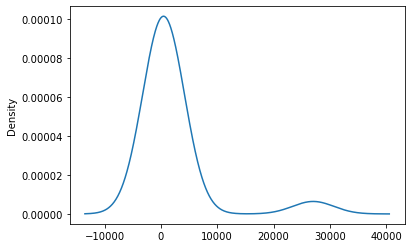

In [119]:
# Visualize the value counts of APPLICATION_TYPE
application_count.plot.density()

In [120]:
# Determine which values to replace if counts are less than ...?
replace_application=list(application_count[application_count<100].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [121]:
# Look at CLASSIFICATION value counts for binning
classification_count=application_df["CLASSIFICATION"].value_counts()
classification_count.head(12)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

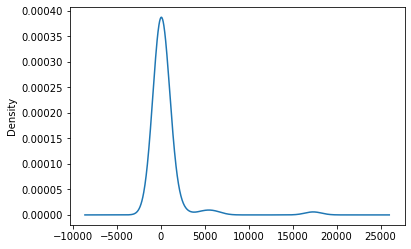

In [122]:
# Visualize the value counts of CLASSIFICATION
classification_count.plot.density()

In [123]:
# Determine which values to replace if counts are less than ..?
replace_class=list(classification_count[classification_count<800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [124]:
# Generate our categorical variable lists
application_cat=application_df.dtypes[application_df.dtypes=="object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [125]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [126]:
# Merge one-hot encoded features and drop the originals
application_df=application_df.merge(encode_df,left_index=True, right_index=True)
application_df=application_df.drop(application_cat,1)
#two special considerations columns remove one, to avoid redundency
application_df=application_df.drop("SPECIAL_CONSIDERATIONS_N",1)
application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34295,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34296,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
# Split our preprocessed data into our features and target arrays
y=application_df["IS_SUCCESSFUL"].values
X=application_df.drop("IS_SUCCESSFUL",1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [128]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [195]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  15
hidden_nodes_layer2 = 5
hidden_nodes_layer3 = 3

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="linear")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="LeakyReLU"))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="ReLU"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 15)                660       
_________________________________________________________________
dense_57 (Dense)             (None, 5)                 80        
_________________________________________________________________
dense_58 (Dense)             (None, 3)                 18        
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 4         
Total params: 762
Trainable params: 762
Non-trainable params: 0
_________________________________________________________________


In [196]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimized/",exist_ok=True)
checkpoint_path = "checkpoints_optimized/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every epoch
#https://stackoverflow.com/questions/59069058/save-model-every-10-epochs-tensorflow-keras-v2
#can save every five epochs by putting an additional argument "period"
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

In [197]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [198]:
# Train the model, with callbacks
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 796us/step - loss: 0.6286 - accuracy: 0.6660
Epoch 2/100
804/804 [==============================] - 1s 800us/step - loss: 0.5769 - accuracy: 0.6985
Epoch 3/100
804/804 [==============================] - 1s 802us/step - loss: 0.5672 - accuracy: 0.7213
Epoch 4/100
804/804 [==============================] - 1s 787us/step - loss: 0.5602 - accuracy: 0.7220
Epoch 5/100
804/804 [==============================] - 1s 764us/step - loss: 0.5586 - accuracy: 0.7215

Epoch 00005: saving model to checkpoints_optimized\weights.05.hdf5
Epoch 6/100
804/804 [==============================] - 1s 843us/step - loss: 0.5576 - accuracy: 0.7238
Epoch 7/100
804/804 [==============================] - 1s 801us/step - loss: 0.5573 - accuracy: 0.7233
Epoch 8/100
804/804 [==============================] - 1s 813us/step - loss: 0.5563 - accuracy: 0.7248
Epoch 9/100
804/804 [==============================] - 1s 796us/step - loss: 0.5555 - accuracy: 0.7245
Epoch

804/804 [==============================] - 1s 787us/step - loss: 0.5496 - accuracy: 0.7294
Epoch 72/100
804/804 [==============================] - 1s 779us/step - loss: 0.5494 - accuracy: 0.7298
Epoch 73/100
804/804 [==============================] - 1s 783us/step - loss: 0.5495 - accuracy: 0.7284
Epoch 74/100
804/804 [==============================] - 1s 780us/step - loss: 0.5494 - accuracy: 0.7277
Epoch 75/100
804/804 [==============================] - 1s 782us/step - loss: 0.5491 - accuracy: 0.7293

Epoch 00075: saving model to checkpoints_optimized\weights.75.hdf5
Epoch 76/100
804/804 [==============================] - 1s 790us/step - loss: 0.5493 - accuracy: 0.7298
Epoch 77/100
804/804 [==============================] - 1s 783us/step - loss: 0.5492 - accuracy: 0.7293
Epoch 78/100
804/804 [==============================] - 1s 786us/step - loss: 0.5491 - accuracy: 0.7299
Epoch 79/100
804/804 [==============================] - 1s 783us/step - loss: 0.5491 - accuracy: 0.7313
Epoch 80/

In [199]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5551 - accuracy: 0.7279
Loss: 0.555118203163147, Accuracy: 0.7279300093650818


In [200]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

<AxesSubplot:>

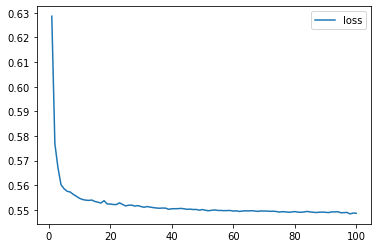

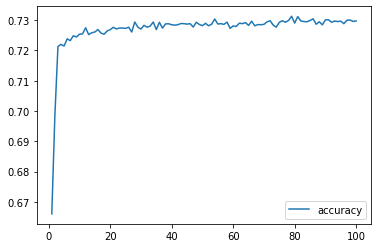

In [201]:
# Create a DF to see the loss & Accuracy
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

# Plot the accuracy
history_df.plot(y="accuracy")